In [4]:
import numpy as np
import pandas as pd

LENGTH = 1000
SPEED = 5

translational = np.ones(LENGTH + 80)*SPEED

translational[np.r_[:100, LENGTH+80-100:LENGTH+80]] = 0

rotational = np.zeros_like(translational)

rotational[np.r_[
    150:200,
    300:350,
    650:700,
    800:850
]] = np.pi/(2*50)

rotational = pd.Series(rotational).rolling(30, center=True).mean().fillna(0)
translational = pd.Series(translational).rolling(80, center=True).mean().fillna(0)

angle = rotational.cumsum()

vx = np.cos(angle)*translational
vy = np.sin(angle)*translational

x = vx.cumsum()
y = vy.cumsum()

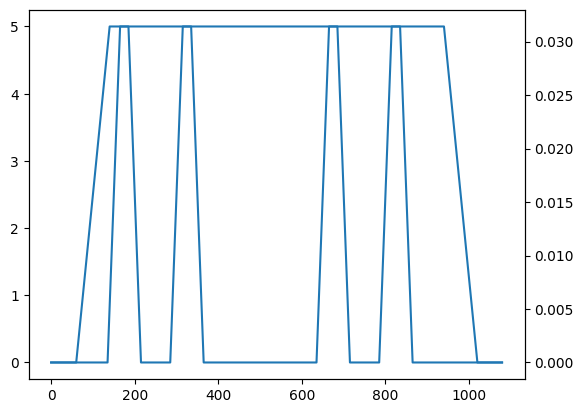

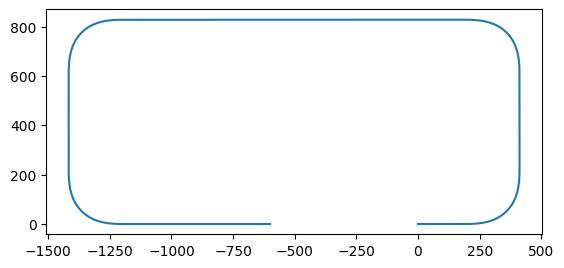

In [5]:
import matplotlib.pyplot as plt

plt.plot(translational)
ax = plt.gca()
# ax.set_ylim((0, 6.5))
ax1 = ax.twinx()
ax1.plot(rotational)
plt.show()
plt.plot(x, y)
# plt.plot(x1, y1)
plt.gca().set_aspect('equal')